In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
df = pd.read_csv('../input/diwali-data-set/Diwali_Sales_Data.csv', encoding='ISO-8859-1')


In [20]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [23]:
df.shape

(11251, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(['Status','unnamed1'], axis=1, inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [29]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [32]:
df.shape

(11251, 13)

In [34]:
df.dropna(inplace = True)

In [35]:
df.shape

(11239, 13)

In [36]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**EXPLORATORY DATA ANALYSIS **

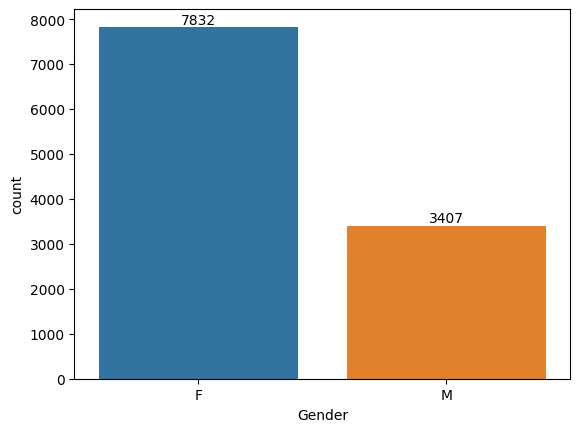

In [39]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

**From the graph we can conclude that most of the buyers are females**


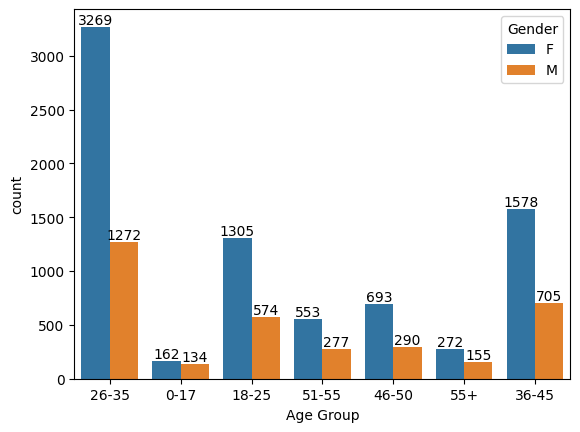

In [41]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')#hue gives us the classification based on men and women 

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

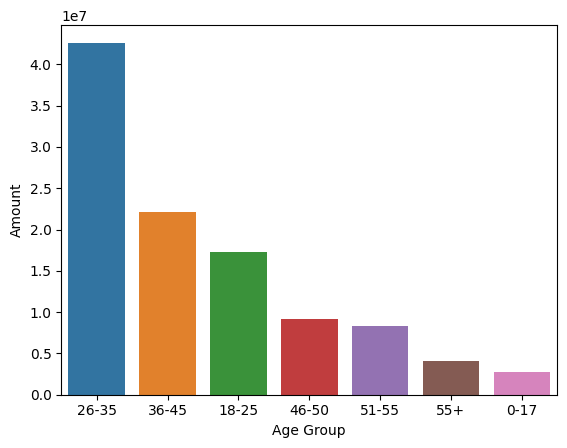

In [44]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

**From the above graph we can see that the most buyers are of age group between 26-35 yrs female**

<Axes: xlabel='State', ylabel='Orders'>

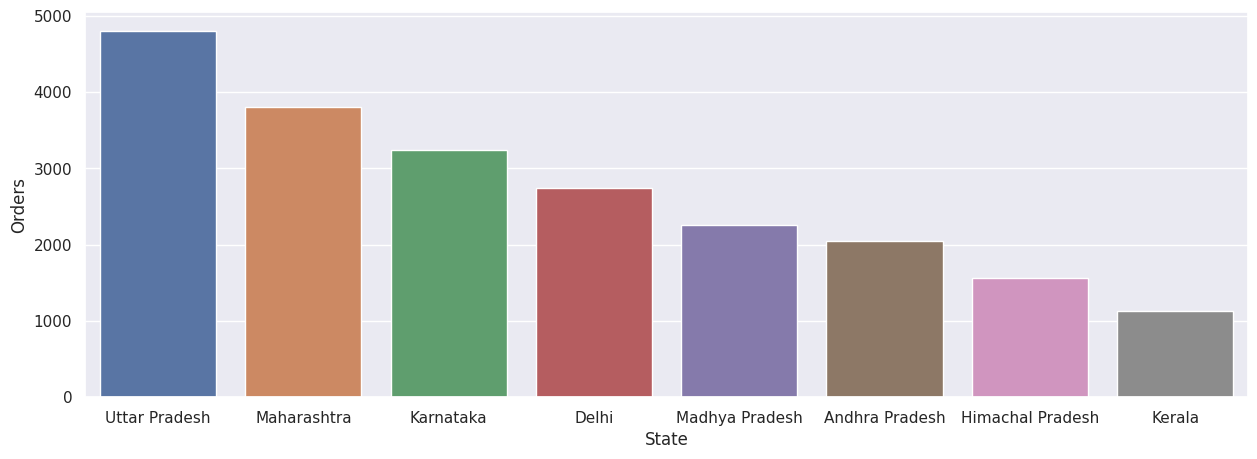

In [50]:
#Total number of orders from top 8 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(8)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot( data = sales_state, x = 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

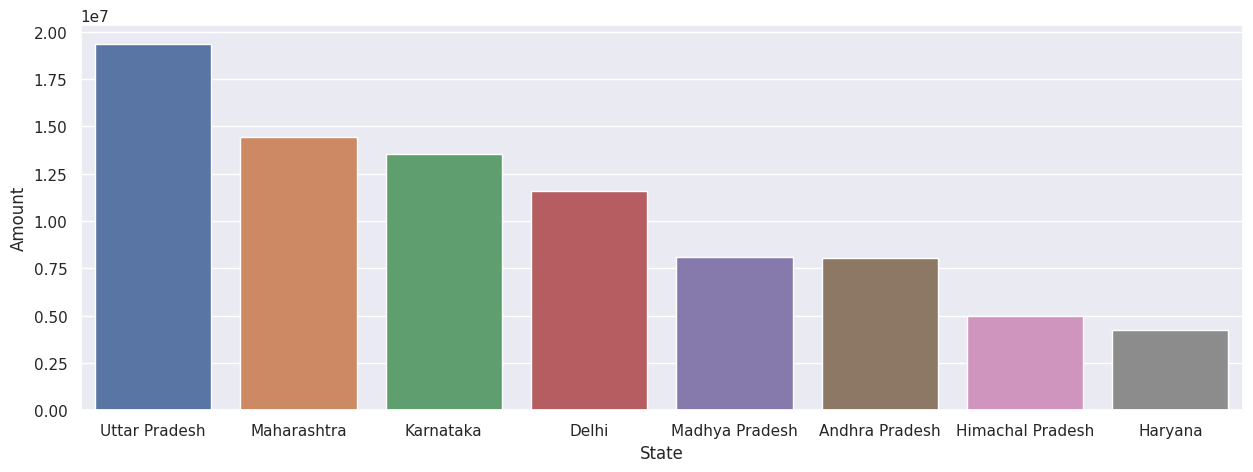

In [51]:
#Total sales from top 8 states
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(8)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot( data = sales_state, x = 'State', y = 'Amount')

**MARITAL STATUS**

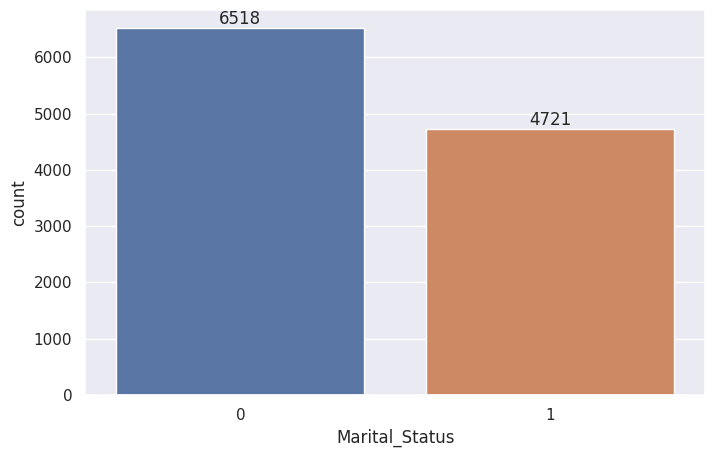

In [55]:
ax = sns.countplot(data = df, x = 'Marital_Status')

for bars in ax.containers:
    sns.set(rc={'figure.figsize':(8,5)})
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

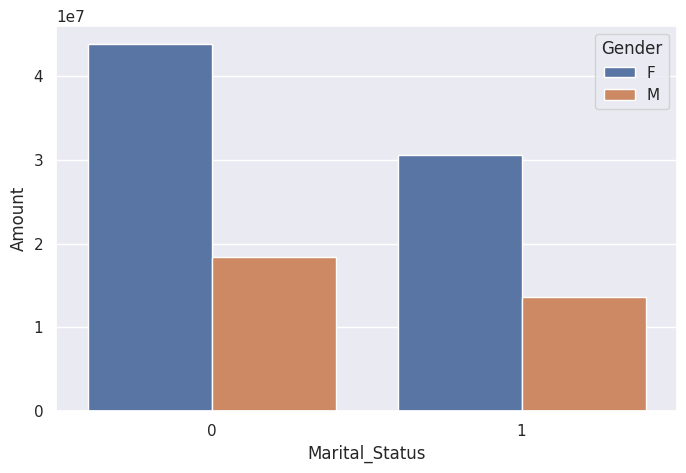

In [57]:
#Total sales from top 8 states
sales_state = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(8)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot( data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

**OCCUPATION**

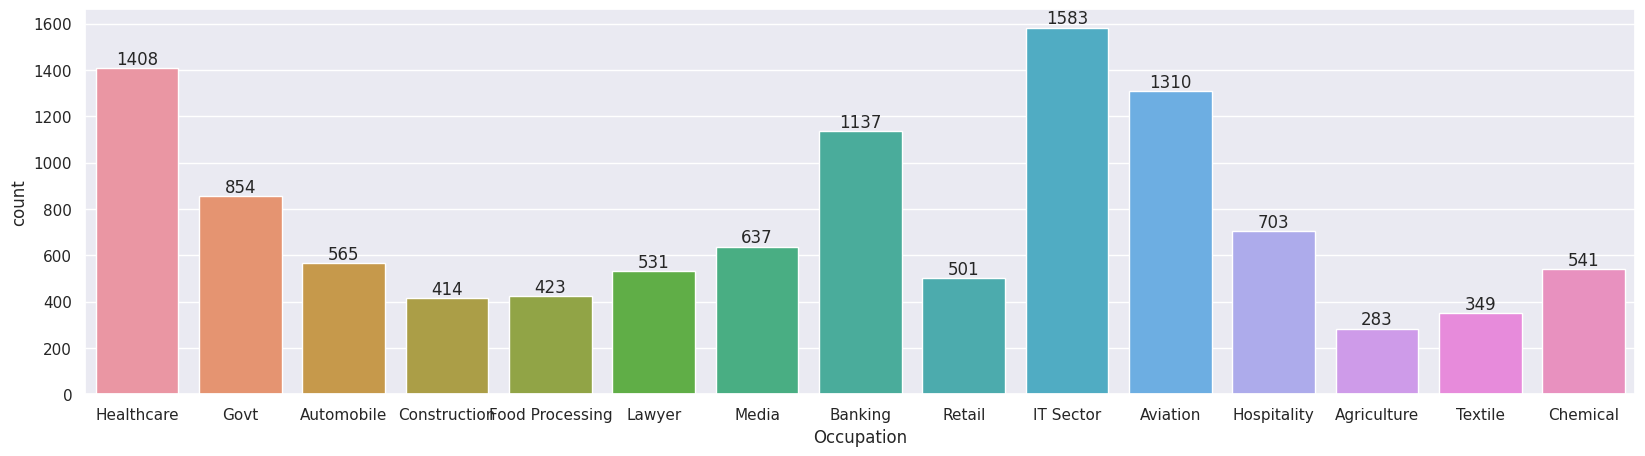

In [60]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

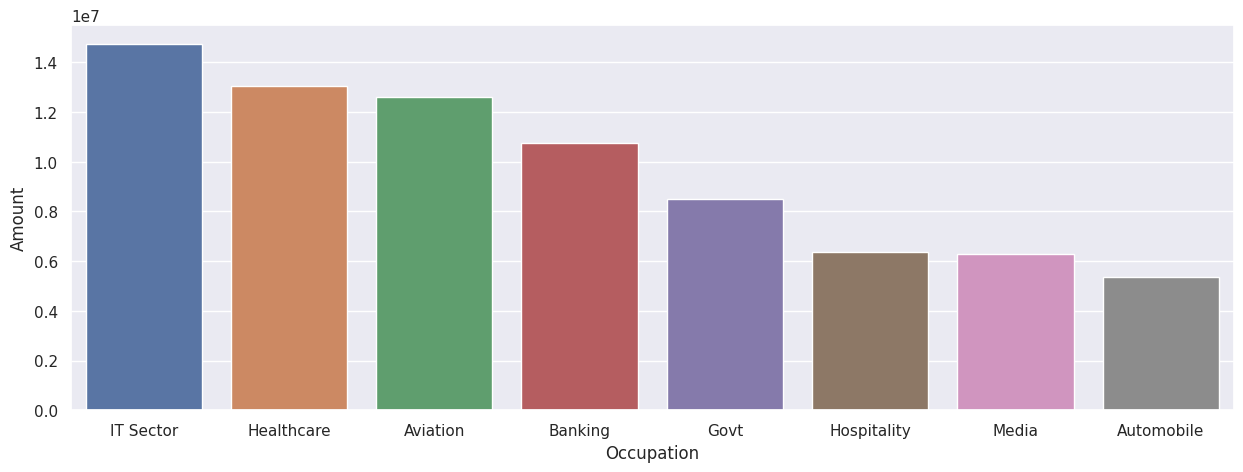

In [61]:
#Total sales from 
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(8)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot( data = sales_state, x = 'Occupation', y = 'Amount')

**From the above graph we can see that most of the buyers are from IT sector, Healthcare and Aviation**

**PRODUCT CATEGORY**

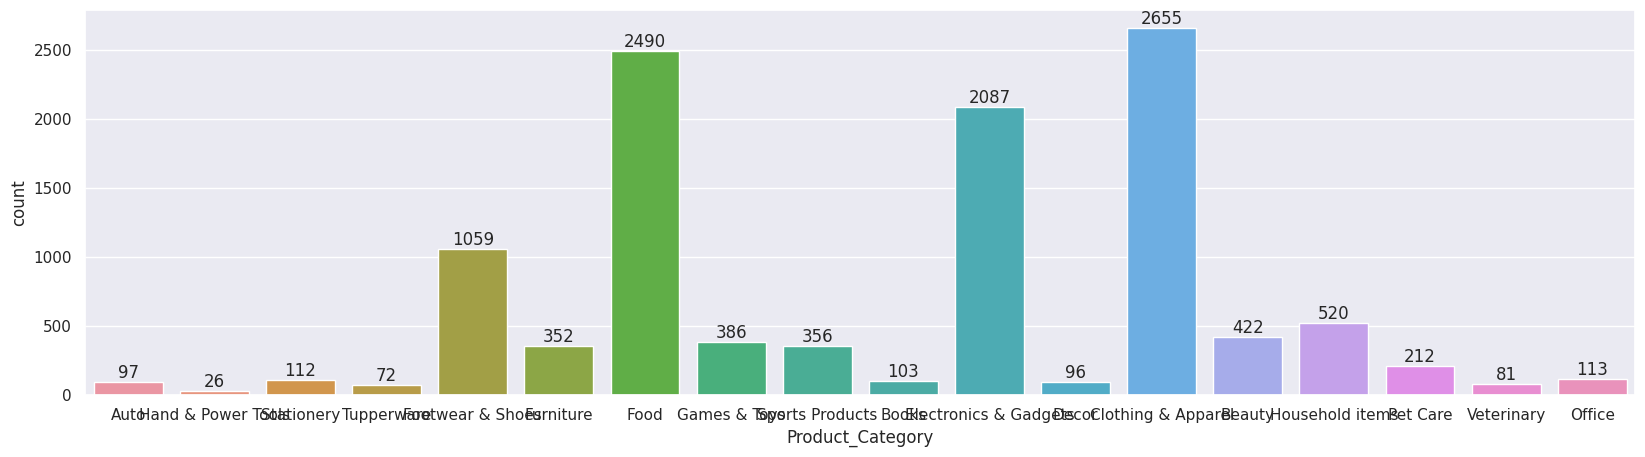

In [68]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

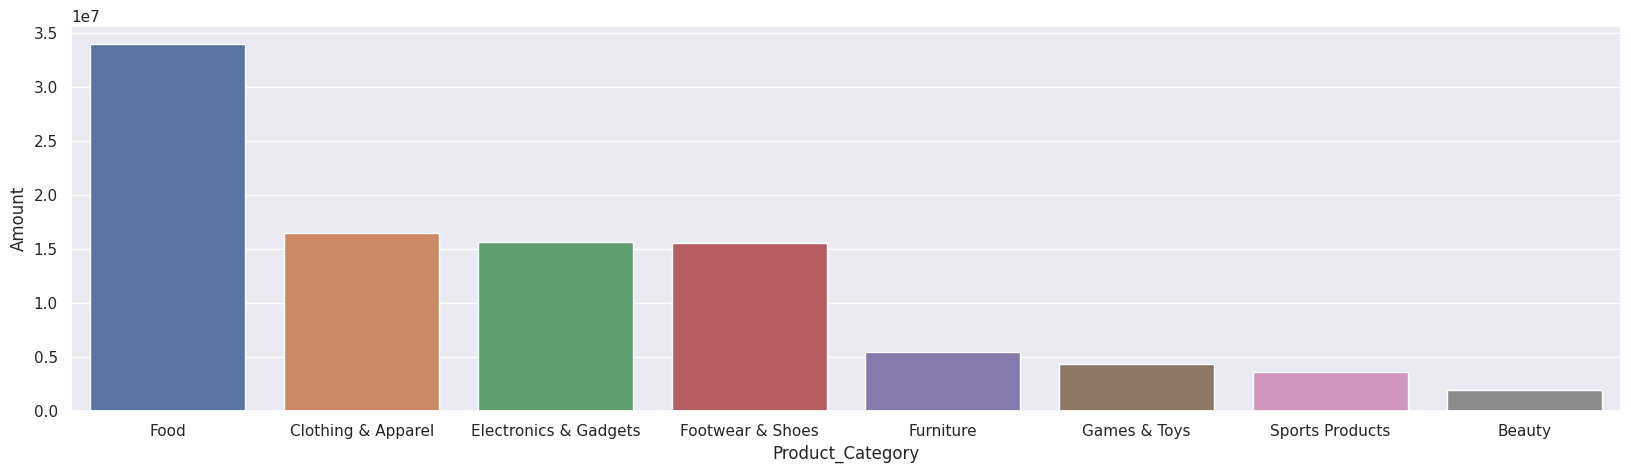

In [71]:
#Total sales from 
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(8)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( data = sales_state, x = 'Product_Category', y = 'Amount')

**From the above graph we can see that the most sold products are from food, clothing and electronic category**

<Axes: xlabel='Product_ID', ylabel='Orders'>

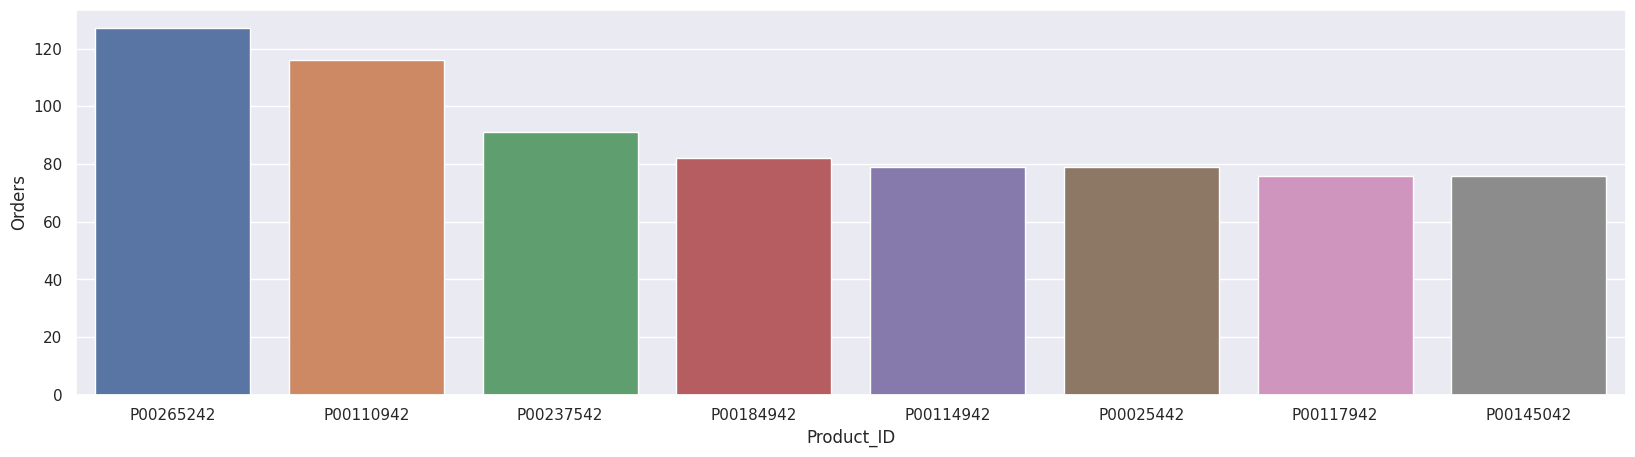

In [73]:
#Total sales based on product IDs
sales_id = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(8)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( data = sales_state, x = 'Product_ID', y = 'Orders')

**From the above graph we can see the most sold products based on their product IDs**

**CONCLUSION:**
**Married women of the age group between 26-35 yrs from UP,Maharashtra and Karnataka , people working in IT, HEALTHCARE AND AVIATION (Mostly Women of the same age group) are more likely to buy products from the category Food, Clothing and Electronics.**